In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle('dataset/purprd_cust.pkl')
df

,제휴사,영수증번호,고객번호,점포코드,구매일자,구매시간,구매금액,구매월,중분류명,소분류명,대분류명,성별,거주지역,연령대
0,A,2757986,15148,10,20140920,20,1000,9,일용잡화,위생세제,가구/인테리어,F,경기 김포시,50대
1,A,2757986,15148,10,20140920,20,4100,9,가공식품,일반가공식품,가공식품,F,경기 김포시,50대
2,A,2757987,400,10,20140920,12,5000,9,농산물,채소,신선식품,F,경기 김포시,60세이상
3,A,2757987,400,10,20140920,12,10200,9,젓갈/반찬,벌크김치,가공식품,F,경기 김포시,60세이상
4,A,2757988,2043,10,20140920,13,3950,9,일용잡화,위생세제,가구/인테리어,F,경기 김포시,50대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,D,253839,15835,40,20151026,13,3000,22,음료,일반차음료,가공식품,M,경기 김포시,30대
28593026,D,253839,15835,40,20151026,13,1300,22,음료,커피음료,가공식품,M,경기 김포시,30대
28593027,D,253840,2070,40,20151026,16,59700,22,헤어케어,샴푸,일상용품,M,울산 동구,50대
28593028,D,253841,15835,40,20151026,23,2000,22,과자,하드캔디,가공식품,M,경기 김포시,30대


In [78]:
def year(x):
    x = str(x)
    return x[:4]

def month(x):
    x = str(x)
    return x[4:6]

df['year'] = df['구매일자'].apply(year)
df['month'] = df['구매일자'].apply(month)

In [82]:
df['month'] = df['month'].astype('int64')

In [83]:
df_1 = df[(df['year']=='2014') & (df['month']<=6)]
df_2 = df[(df['year']=='2014') & (df['month']>6)]
df_3 = df[(df['year']=='2015') & (df['month']<=6)]
df_4 = df[(df['year']=='2015') & (df['month']>6)]

In [161]:
man_30_1 = df_1[(df_1['성별']=='M') & (df_1['연령대']=='30대')]
man_30_2 = df_2[(df_2['성별']=='M') & (df_2['연령대']=='30대')]
man_30_3 = df_3[(df_3['성별']=='M') & (df_3['연령대']=='30대')]
man_30_4 = df_4[(df_4['성별']=='M') & (df_4['연령대']=='30대')]

In [165]:
test1 = man_30_1.groupby('고객번호')[['구매금액']].sum()
test2 = man_30_2.groupby('고객번호')[['구매금액']].sum()
test3 = man_30_3.groupby('고객번호')[['구매금액']].sum()
test4 = man_30_4.groupby('고객번호')[['구매금액']].sum()

In [200]:
A = pd.merge(test1,test2, on ='고객번호', how ='outer')

In [201]:
B = pd.merge(A, test3, on = '고객번호', how='outer')

In [202]:
total = pd.merge(B, test4, on = '고객번호', how='outer')

In [203]:
total.fillna(0, inplace=True)

In [204]:
total.columns = ['14_1','14_2','15_1','15_2']

In [205]:
total['d1'] = total['14_2'] - total['14_1']
total['d2'] = total['15_1'] - total['14_2']
total['d3'] = total['15_2'] - total['15_1']
total

,14_1,14_2,15_1,15_2,d1,d2,d3
고객번호,,,,,,,
7847,5206224.0,6595654.0,5353841.0,4166249.0,1389430.0,-1241813.0,-1187592.0
7848,4034491.0,4654582.0,4033322.0,3614570.0,620091.0,-621260.0,-418752.0
7853,1111723.0,1461602.0,2094987.0,1327364.0,349879.0,633385.0,-767623.0
7856,8254127.0,10604620.0,9101827.0,7903292.0,2350493.0,-1502793.0,-1198535.0
7867,11833944.0,11915167.0,5400436.0,5524092.0,81223.0,-6514731.0,123656.0
...,...,...,...,...,...,...,...
13643,0.0,0.0,581100.0,615300.0,0.0,581100.0,34200.0
14698,0.0,0.0,1000.0,104010320.0,0.0,1000.0,104009320.0
16020,0.0,0.0,992400.0,924130.0,0.0,992400.0,-68270.0


In [212]:
print('14 상반기 => 14 하반기', len(total[total['d1'] < 0 ].index))
print('14 하반기 => 15 상반기', len(total[total['d2'] < 0 ].index))
print('15 상반기 => 15 하반기', len(total[total['d3'] < 0 ].index))
394/994  # 0.39


14 상반기 => 14 하반기 394
14 하반기 => 15 상반기 485
15 상반기 => 15 하반기 487


0.3963782696177062

In [181]:
total.loc[17382]

구매금액_x        NaN
구매금액_y        NaN
구매금액_x        NaN
구매금액_y    15490.0
Name: 17382, dtype: float64

In [182]:
AA[AA['고객번호']==17382]

,고객번호,구매금액_x,구매금액_y,구매금액_x,구매금액_y
992,17382,NaN,NaN,NaN,NaN


In [154]:
pv1 = pd.pivot_table(df_1, index='성별',columns='연령대', values='구매금액', aggfunc='sum')
pv2 = pd.pivot_table(df_2, index='성별',columns='연령대', values='구매금액', aggfunc='sum')
pv3 = pd.pivot_table(df_3, index='성별',columns='연령대', values='구매금액', aggfunc='sum')
pv4 = pd.pivot_table(df_4, index='성별',columns='연령대', values='구매금액', aggfunc='sum')

In [156]:
mans_pv = pd.concat([pv1.iloc[[1]] ,pv2.iloc[[1]] ,pv3.iloc[[1]] ,pv4.iloc[[1]]])
mans_pv

연령대,19세이하,20대,30대,40대,50대,60세이상
성별,,,,,,
M,8499135,497041672,9492274688,11810188846,7180397122,2793675858
M,12018524,629180254,10387672595,12191680057,7957293446,3245062775
M,10190662,708978176,9171432092,12230892909,7872029280,2840844729
M,10967059,739876247,9946768170,12839785097,8028094354,2905244160


In [158]:
women_pv = pd.concat([pv1.iloc[[0]] ,pv2.iloc[[0]] ,pv3.iloc[[0]] ,pv4.iloc[[0]]])
women_pv

연령대,19세이하,20대,30대,40대,50대,60세이상
성별,,,,,,
F,22926301,3626528168,26413596913,48917966284,35799262779,11678372374
F,33082978,4779410269,29744907610,51201943708,38658107365,12520750860
F,23078653,5613408737,28691780882,51627294515,38652437849,11846781661
F,19830335,5960547537,29859594328,54630855796,40389838902,12796764230


<AxesSubplot:xlabel='성별'>

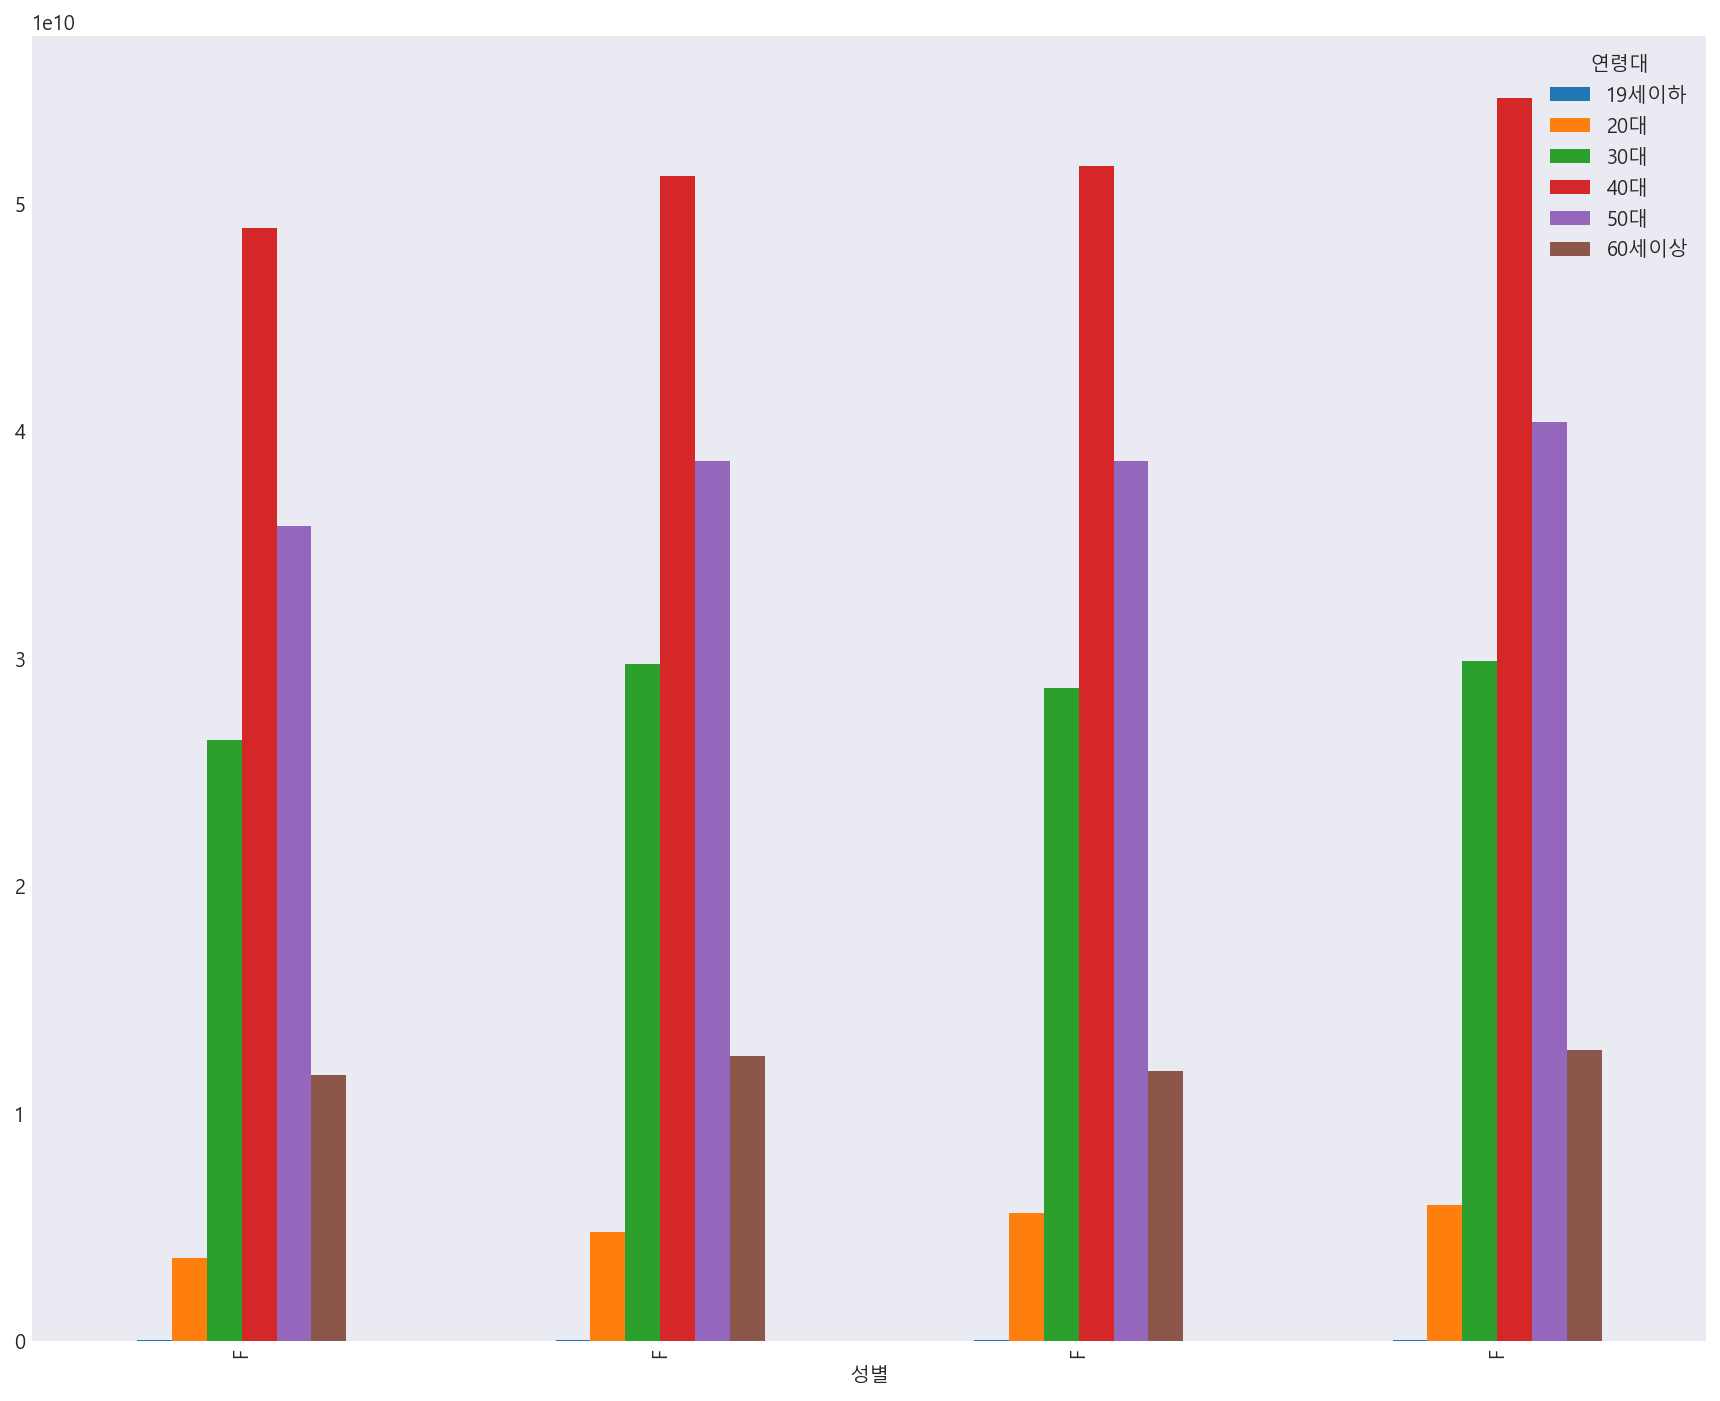

In [159]:
women_pv.plot(kind='bar',figsize=(15,12))

<AxesSubplot:xlabel='성별'>

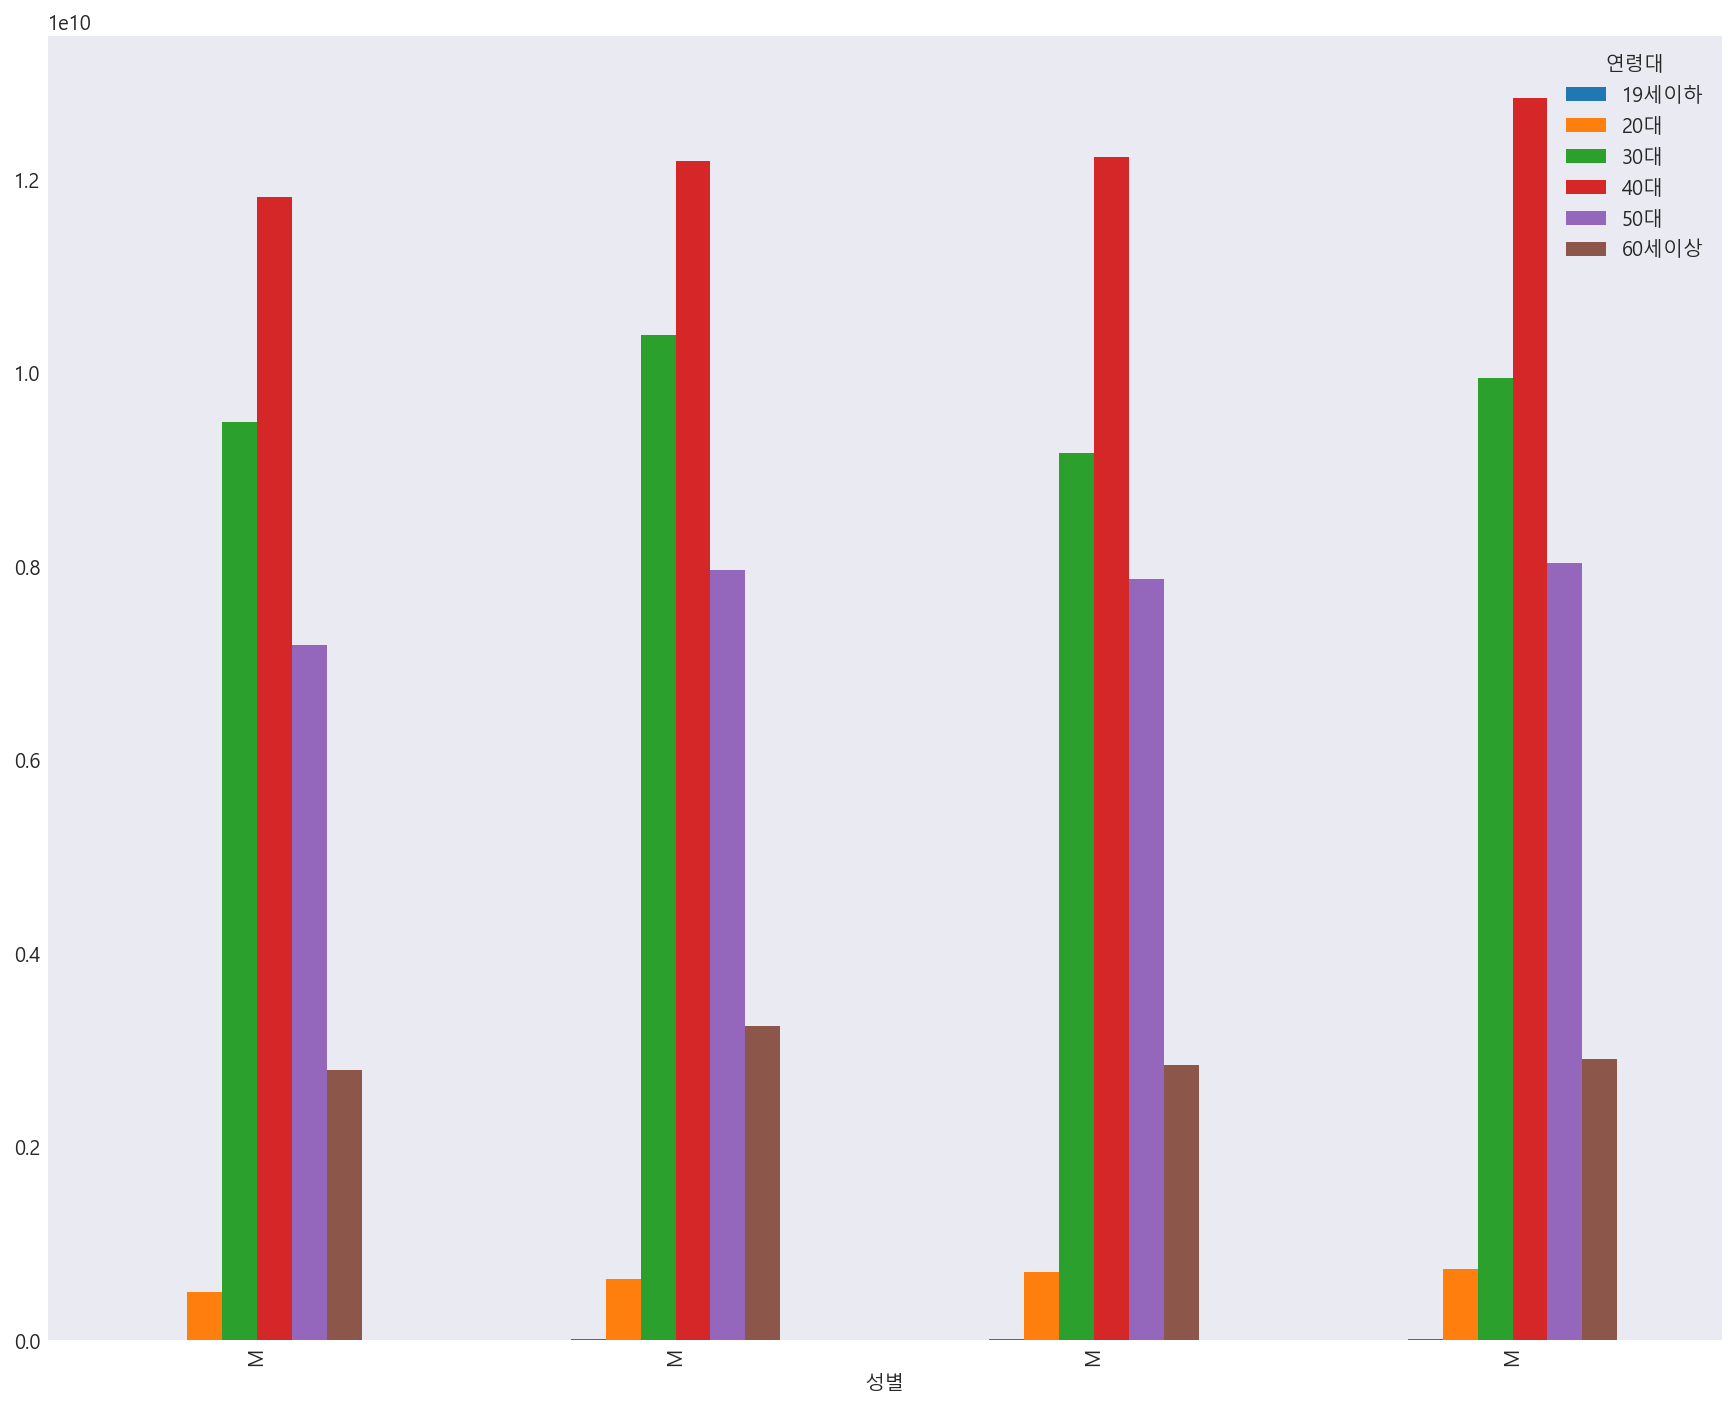

In [157]:
mans_pv.plot(kind='bar',figsize=(15,12))

In [87]:
data = pd.concat([pv1,pv2,pv3,pv4])

In [116]:
data.reset_index(inplace=True)

In [119]:
data.drop('index',axis=1,inplace=True)


AttributeError: 'DataFrame' object has no attribute 'rename_index'

In [123]:
data = data.rename(index={0:'14-1', 1:'14-2', 2:'15-1', 3:'15-2'})

In [124]:
data

연령대,19세이하,20대,30대,40대,50대,60세이상
14-1,31425436,4123569840,35905871601,60728155130,42979659901,14472048232
14-2,45101502,5408590523,40132580205,63393623765,46615400811,15765813635
15-1,33269315,6322386913,37863212974,63858187424,46524467129,14687626390
15-2,30797394,6700423784,39806362498,67470640893,48417933256,15702008390


<AxesSubplot:>

<Figure size 1080x864 with 0 Axes>

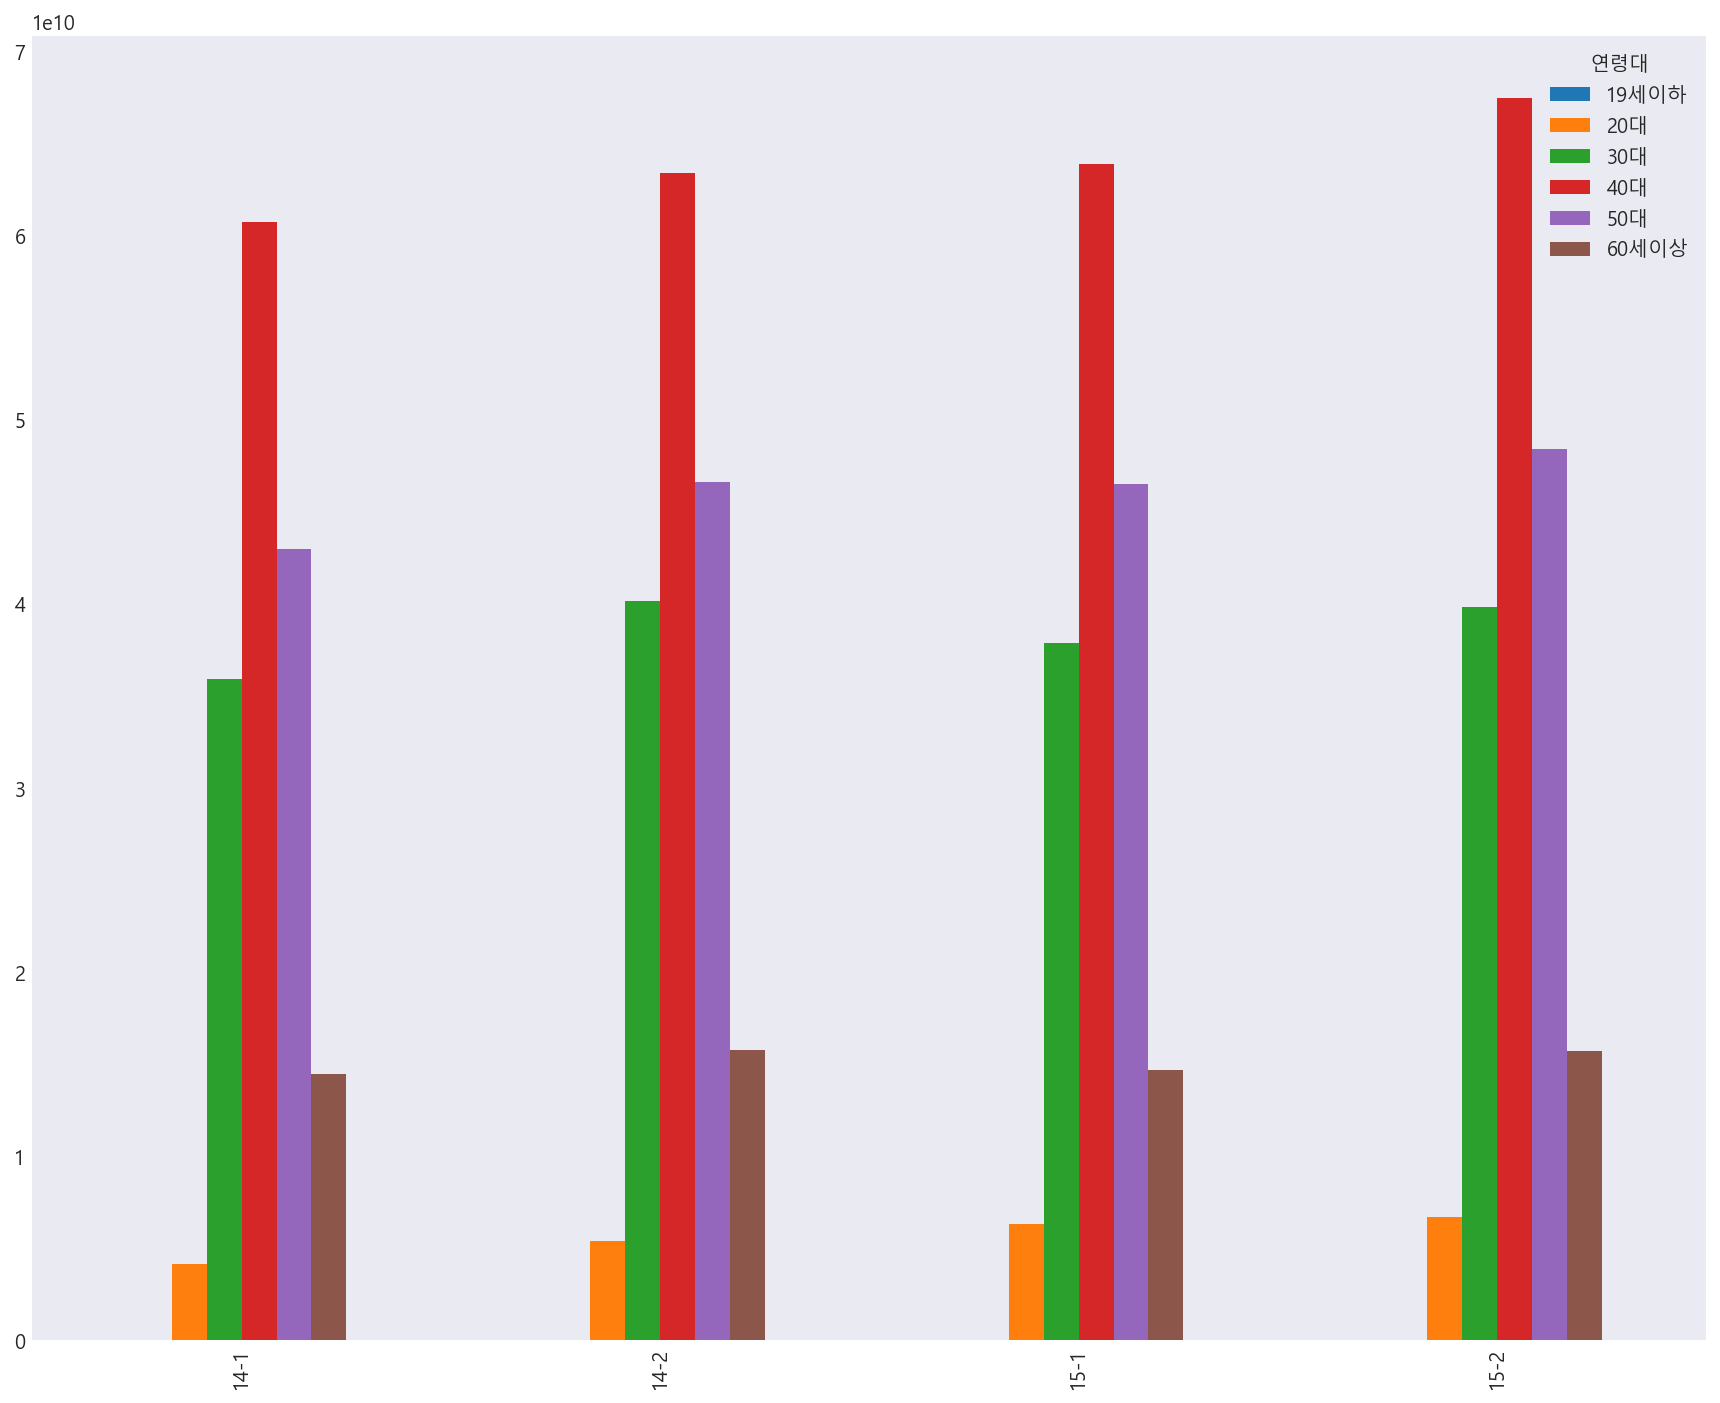

In [129]:
import matplotlib.pyplot as plt
from matplotlib import rc

%config InlineBackend.figure_format = 'retina'
rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False #

plt.figure(figsize=(15,12))

data.plot(kind='bar',figsize=(15,12))

In [63]:
test.reset_index()

,구매일자,구매금액
0,20140108,42950
1,20140113,24000
2,20140114,41020
3,20140115,132240
4,20140117,42000
...,...,...
227,20151218,163900
228,20151226,6980
229,20151227,308900
230,20151228,66880


<AxesSubplot:xlabel='구매일자', ylabel='구매금액'>

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

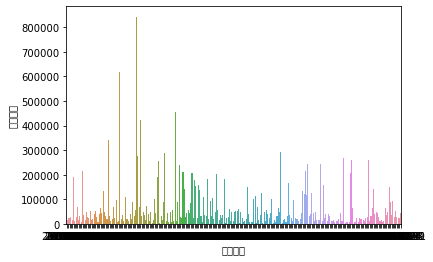

In [72]:
import seaborn as sns
test = df[(df['고객번호']==4)].groupby('구매일자')[['구매금액']].sum().reset_index()
sns.barplot(data= test , x=test['구매일자'],y=test['구매금액'])

In [48]:
df.거주지역.value_counts()

경기 김포시     9048040
부산 기장      2533161
서울 송파구     2188368
인천 계양구     1731212
경상남도 함양    1228414
서울 노원구     1139970
광주 북구       972738
전라북도 군산     824423
서울 강남구      795692
충청북도        619727
전라남도 영광     597779
경상북도 영주     588043
대전 유성구      560302
서울 동대문구     552591
대구 동구       487676
서울 광진구      466495
서울 성동구      436510
충청남도 천안     406766
강원도 철원      328030
서울 강서구      303629
서울 도봉구      266061
서울 강북구      232119
울산 동구       230737
서울 서대문구     207180
서울 서초구      178614
서울 마포구      151758
서울 영등포구     147603
서울 성북구      146354
서울 용산구      139678
서울 은평구      129566
서울 강동구       95916
서울 구로구       94399
서울 동작구       93095
서울 관악구       91533
서울 종로구       73729
서울 중랑구       71729
서울 중구        66807
서울 양천구       65966
세종 장군        49051
서울 금천구       46630
Name: 거주지역, dtype: int64

<AxesSubplot:xlabel='성별,연령대'>

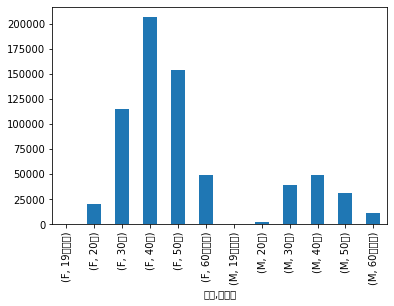

In [9]:
(df.groupby(['성별','연령대'])['구매금액'].sum()/1000000).plot(kind='bar')

In [12]:
전체구매금액 = df['구매금액'].sum()
여성구매금액 = df[(df['성별']=='F')]['구매금액'].sum()
남성구매금액 = df[(df['성별']=='M')]['구매금액'].sum()

In [14]:
print('여성구매금액 비율', 여성구매금액/전체구매금액 * 100)
print('남성구매금액 비율', 남성구매금액/전체구매금액 * 100)

여성구매금액 비율 80.27971785757977
남성구매금액 비율 19.720282142420228


In [36]:
전체연령대 = df['연령대'].value_counts()
전체연령대

40대      12385734
50대       6885323
30대       6619280
60세이상     1685516
20대        997707
19세이하       19470
Name: 연령대, dtype: int64

In [37]:
여성연령대 = df[(df['성별']=='F')]['연령대'].value_counts()

In [38]:
남성연령대 = df[(df['성별']=='M')]['연령대'].value_counts()

In [44]:
(여성연령대 / 전체연령대 *100)

40대      83.015468
50대      84.554232
30대      76.776946
60세이상    81.720553
20대      79.863327
19세이하    62.845403
Name: 연령대, dtype: float64

In [43]:
(남성연령대 / 전체연령대 *100)

19세이하    37.154597
20대      20.136673
30대      23.223054
40대      16.984532
50대      15.445768
60세이상    18.279447
Name: 연령대, dtype: float64

In [24]:
 여성대분류구매 = df[(df['성별']=='F')]['대분류명'].value_counts()

In [25]:
 남성대분류구매 = df[(df['성별']=='M')]['대분류명'].value_counts()

In [26]:
전체대분류구매 =  여성대분류구매 + 남성대분류구매

In [27]:
여성대분류구매/전체대분류구매*100

가공식품        80.522533
가구/인테리어     83.905519
교육/문화용품     78.870543
기타          76.461086
디지털/가전      79.709788
명품          82.202671
신선식품        83.118867
의류          84.496928
일상용품        81.833211
전문스포츠/레저    82.116196
패션잡화        84.250972
Name: 대분류명, dtype: float64

In [29]:
남성대분류구매/전체대분류구매*100

가공식품        19.477467
가구/인테리어     16.094481
교육/문화용품     21.129457
기타          23.538914
디지털/가전      20.290212
명품          17.797329
신선식품        16.881133
의류          15.503072
일상용품        18.166789
전문스포츠/레저    17.883804
패션잡화        15.749028
Name: 대분류명, dtype: float64